In [27]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import math
from os.path import exists

In [21]:
TRAIN_CSV = './data/train.csv'
DEPTH_CSV = 'depths.csv'

TRAIN_IMAGE_DIR = 'D:/_phd/datasets/tgsSalt/train/images/'
TRAIN_MASK_DIR  = 'D:/_phd/datasets/tgsSalt/train/masks/'

TEST_IMAGE_DIR  = 'D:/_phd/datasets/tgsSalt/test/images/'

In [18]:
df_train = pd.read_csv(TRAIN_CSV)
df = df_train
df['salt'] = df['rle_mask'].notnull().replace([False, True], [0,1]) #0 = no_salt #1 = salt
salt = df[df['rle_mask'].notnull()]
df.head()

,id,rle_mask,salt
0,575d24d81d,NaN,0
1,a266a2a9df,5051 5151,1
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1


In [105]:
df.columns

Index(['id', 'rle_mask', 'salt', 'coverage'], dtype='object')

In [20]:
def limites(msk):
        number_of_white_pix = np.sum(msk == 255)
        if (number_of_white_pix>(10201*0.1)) & (number_of_white_pix<(10201*0.9)):
                result = True
        else:
                result = False
    
        return result

def coverage(label):
        path = TRAIN_MASK_DIR + f'{label}.png'
        white_pix = -1.0
        if exists(path):
                mask = cv2.imread(path)
                gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
                white_pix = np.sum(gray == 255)
        return white_pix/10201

In [29]:
def class_cover(val):
    r = math.trunc(10*val)
    return r

In [25]:

 # a coluna coverage em todas as linhas do df recebe o resultado da função coverage(id)
df['coverage']=df['id'].map(coverage)


In [22]:
coverage('75efad62c1')

0.993333986864033

In [30]:
df['class']=df.coverage.map(class_cover)

In [40]:
salt=salt[salt['class']<9]

In [42]:
salt

,id,rle_mask,salt,coverage,class
1,a266a2a9df,5051 5151,1,0.504950,5
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1,0.149201,1
5,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...,1,0.225370,2
7,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...,1,0.665817,6
8,50d3073821,1 2121 9293 909,1,0.297030,2
...,...,...,...,...,...
3981,0530b67189,3938 2 4032 9 4127 15 4221 22 4310 34 4398 47 ...,1,0.566023,5
3987,e8d8b35601,79 11 177 13 276 14 375 15 474 16 573 18 672 1...,1,0.494559,4
3988,a7cfa30d35,1 84 102 83 203 81 304 79 405 77 506 75 607 73...,1,0.145084,1
3996,caa039b231,2398 7 2499 11 2600 16 2700 22 2801 26 2901 29...,1,0.376924,3


In [6]:
rand_idx = np.random.randint(0, 2438, 10) #generate 10 random indexes from 0 to 4000

In [56]:
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    figs = salt['id'][file]
    path = TRAIN_MASK_DIR + f'{figs}.png'
    mask = cv2.imread(f'train/masks/{figs}.png')
    msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    thresholds = limites(msk)
    print (i+1, thresholds )

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1440x360 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: 'train/masks/2d64b6a8cf.png'

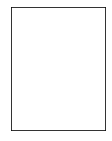

In [57]:
#check sample image
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks = [])
    figs = salt['id'][file]
    mask = mpimg.imread(f'train/masks/{figs}.png')
    ax.imshow(mask, alpha=0.35, cmap='gray')
plt.tight_layout()
plt.show()


In [11]:
file = 2906
figs=df['id'][file]
img = mpimg.imread(TRAIN_IMAGE_DIR+f'{figs}.png')
mask = cv2.imread(TRAIN_MASK_DIR+f'{figs}.png')

FileNotFoundError: [Errno 2] No such file or directory: './train/images/9bf022776e.png'

In [25]:
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

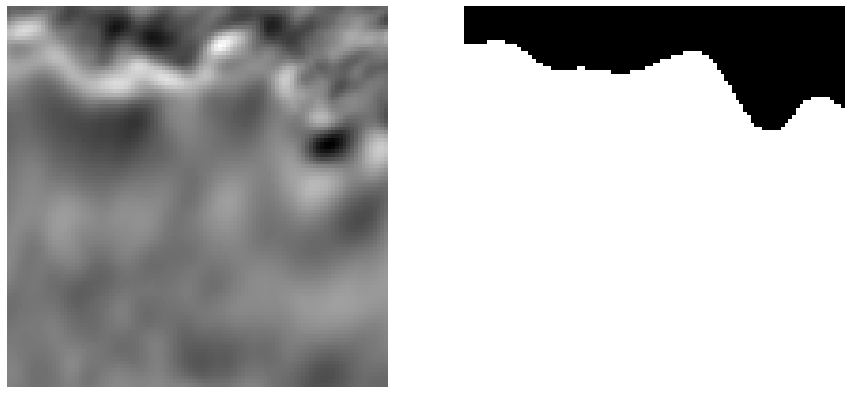

In [28]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1); plt.imshow(bgr);  plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(msk,cmap='gray',); plt.axis('off')
plt.show()

In [30]:
# counting the number of pixels
number_of_white_pix = np.sum(msk == 255)
number_of_black_pix = np.sum(msk == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 8340
Number of black pixels: 1861


In [37]:
if (number_of_white_pix>1000) & (number_of_white_pix<9000):
    print (True)
else:
    print (False)


True
